In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4
import os
import matplotlib.pyplot as plt
import random
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

2024-10-13 08:46:39.433358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 08:46:39.433470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 08:46:39.563530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# import train.csv file
train_df = pd.read_csv("/kaggle/input/paddy-disease-classification/train.csv")
train_df.head()

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

In [3]:
# Check the value counts of the label column
train_df['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [4]:
# Check the number of unique values
train_df['label'].nunique()

10

In [5]:
rescale = tf.keras.layers.Rescaling(1./255)

## Loads Data

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/paddy-disease-classification/train_images',
    batch_size = 32,
    image_size = (224, 224),
    validation_split=0.2,
    subset="training",
    seed=123  
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/paddy-disease-classification/train_images',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123 
)


test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/paddy-disease-classification/test_images',
    batch_size = 32,
    image_size = (224, 224),
    label_mode = None,
    shuffle=False
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.
Found 3469 files belonging to 1 classes.


## Data Visualisation

In [7]:
fig = px.scatter(train_df, x="age", y= "variety",color = "label")
fig.show()

In [8]:
fig = px.bar(train_df, x='label' , y='age', color='label')
fig.show()

In [9]:
# Create a sunburst plot
fig = px.sunburst(train_df, 
                  path=['label', 'variety'], 
                  values='age' , color='label')
# Show the plot
fig.show()

In [10]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


### Diseased Images

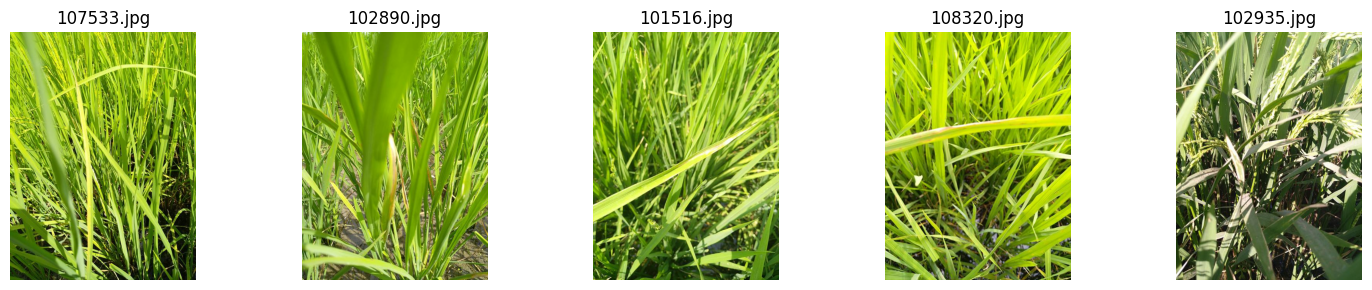

In [11]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_blight"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

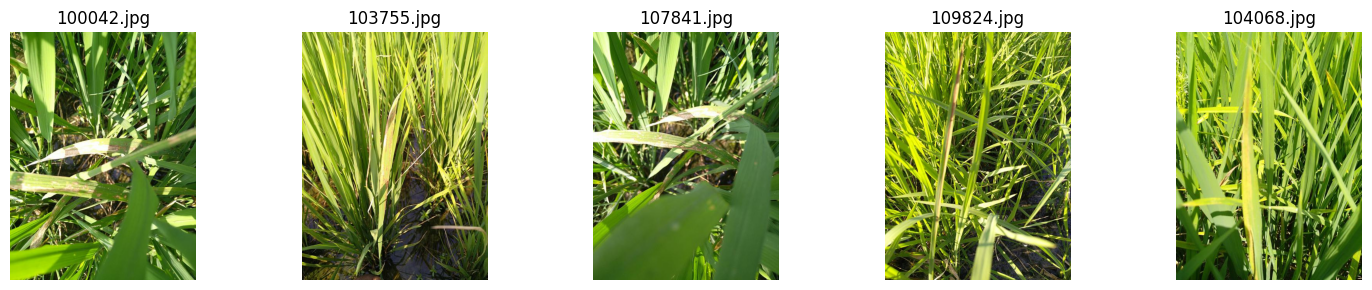

In [12]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_streak"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

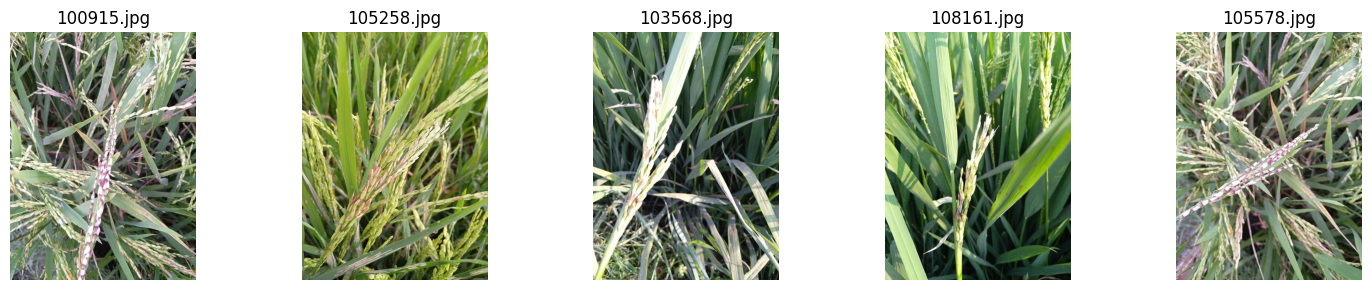

In [13]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/bacterial_panicle_blight"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

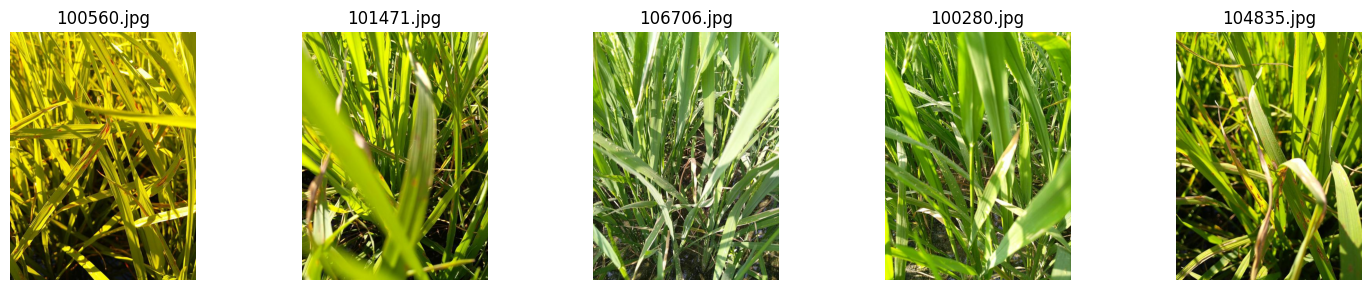

In [14]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/blast"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

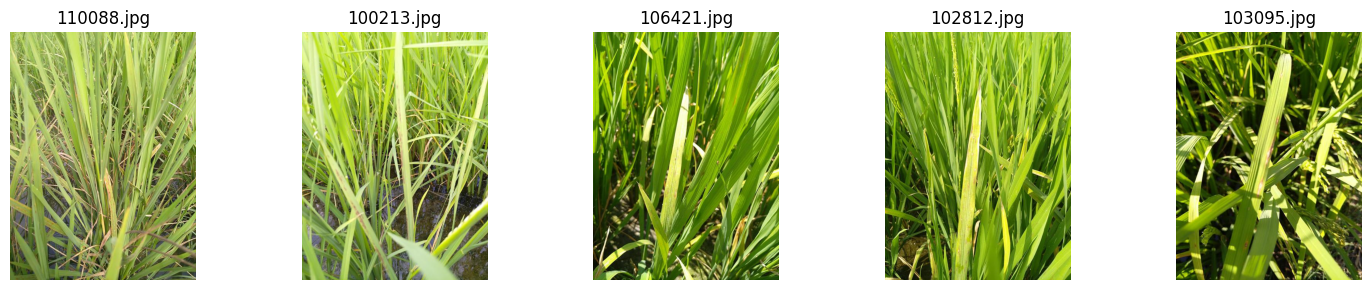

In [15]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/brown_spot"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

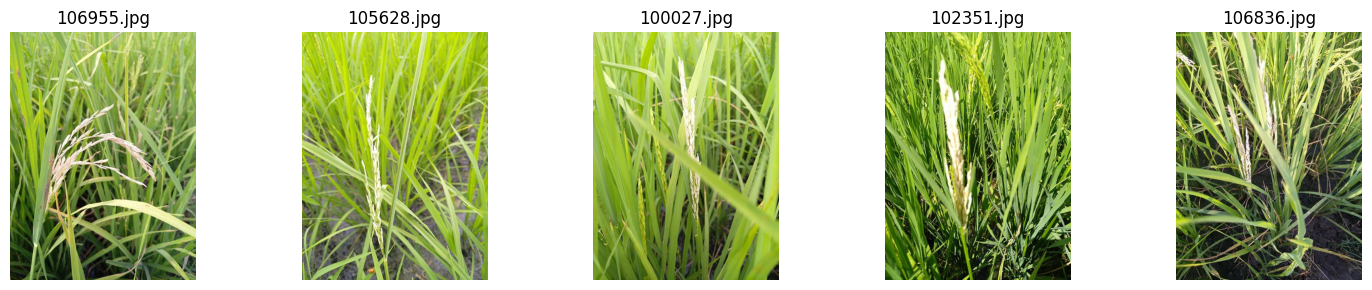

In [16]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/dead_heart"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

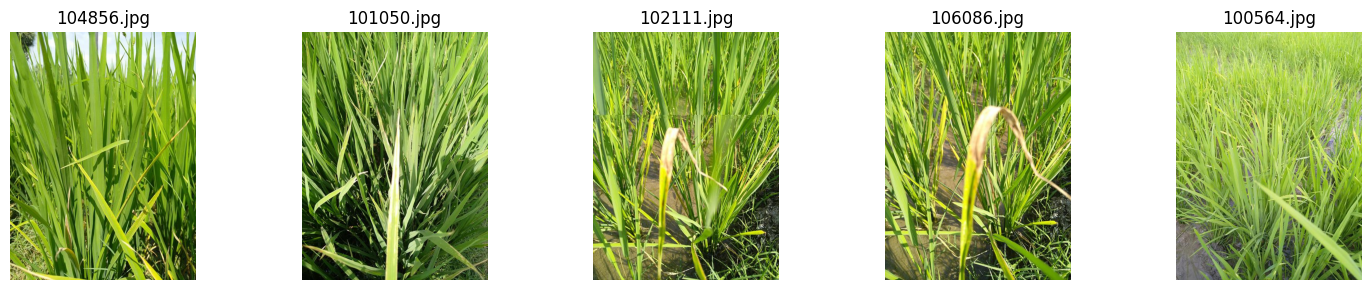

In [17]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/downy_mildew"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

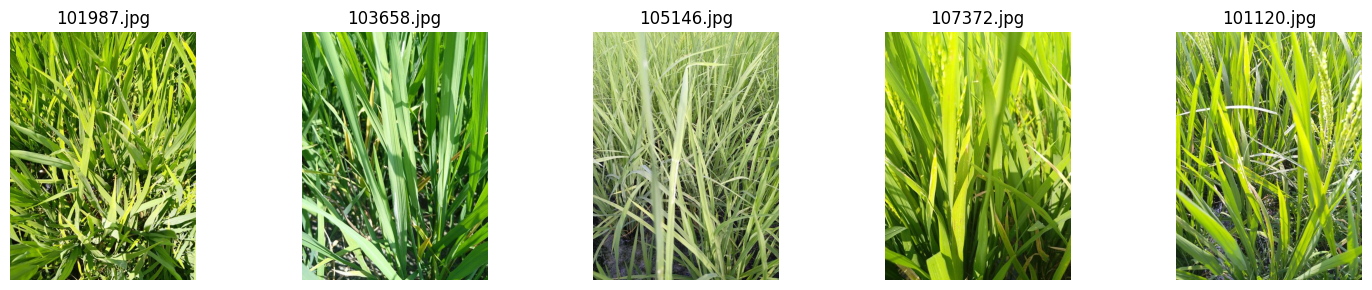

In [18]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/hispa"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

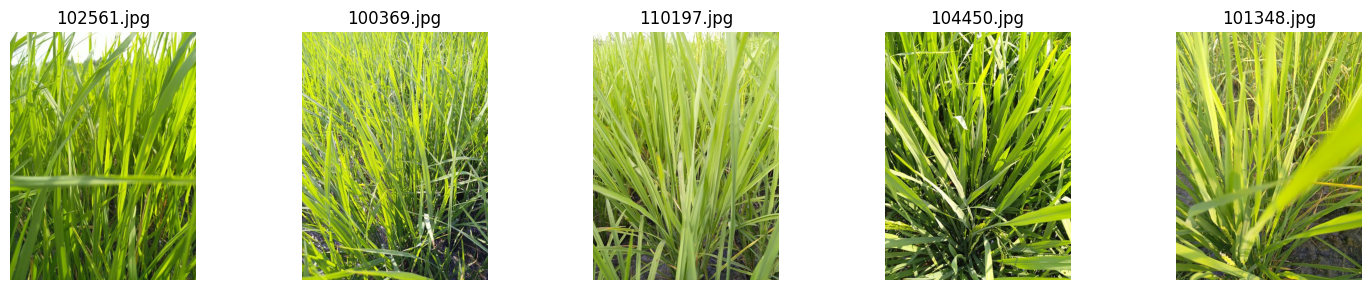

In [19]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

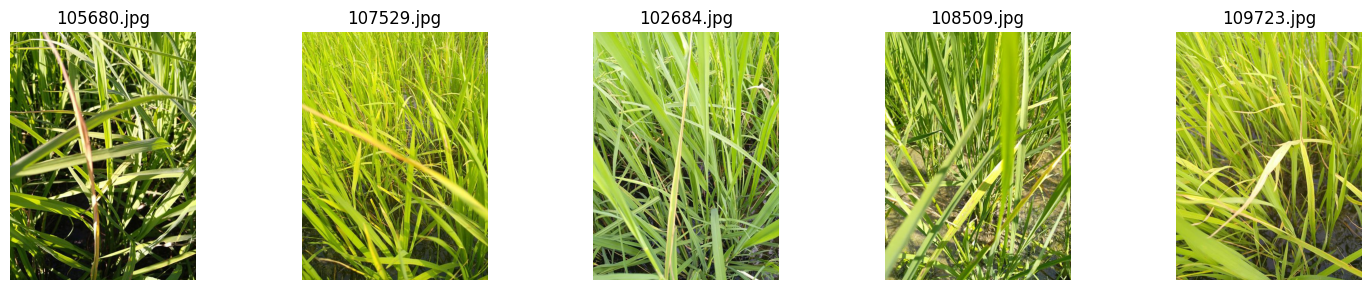

In [20]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/tungro"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Building model

### Transfer Learning:

In [22]:
# Load the pre-trained EfficientNetB4 model without the top classification layer
efficientnet_base = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained base model layers
efficientnet_base.trainable = False

71686520/71686520 [==============================] - 0s 0us/step


In [23]:
from keras.models import Sequential
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(efficientnet_base)

# Add global average pooling layer to reduce spatial dimensions
model.add(AveragePooling2D())

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))

# Dropout Layer
model.add(Dropout(0.25)) 

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))

## ***Check The Summary Of Model:***

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 7, 7, 1792)        17673823  
 )                                                               
                                                                 
 average_pooling2d (Average  (None, 3, 3, 1792)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 16128)             0         
                                                                 
 dense (Dense)               (None, 220)               3548380   
                                                                 
 dropout (Dropout)           (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2

## Compile the Model

In [25]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Training:

In [26]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=20,
          callbacks=[early_stopping])

Epoch 1/20


2024-10-13 08:47:44.707343: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1728809268.333493      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


261/261 [==============================] - 54s 146ms/step - loss: 1.2541 - accuracy: 0.5876 - val_loss: 0.8091 - val_accuracy: 0.7453
Epoch 2/20
261/261 [==============================] - 31s 120ms/step - loss: 0.7299 - accuracy: 0.7681 - val_loss: 0.5866 - val_accuracy: 0.8217
Epoch 3/20
261/261 [==============================] - 31s 119ms/step - loss: 0.5341 - accuracy: 0.8376 - val_loss: 0.5030 - val_accuracy: 0.8419
Epoch 4/20
261/261 [==============================] - 31s 120ms/step - loss: 0.4401 - accuracy: 0.8663 - val_loss: 0.4209 - val_accuracy: 0.8679
Epoch 5/20
261/261 [==============================] - 31s 119ms/step - loss: 0.3509 - accuracy: 0.8966 - val_loss: 0.3944 - val_accuracy: 0.8727
Epoch 6/20
261/261 [==============================] - 31s 120ms/step - loss: 0.2957 - accuracy: 0.9117 - val_loss: 0.3340 - val_accuracy: 0.8928
Epoch 7/20
261/261 [==============================] - 31s 120ms/step - loss: 0.2542 - accuracy: 0.9279 - val_loss: 0.3274 - val_accuracy: 0.8

## Plotting The Loss And Accuracy:

66/66 [==============================] - 6s 91ms/step - loss: 0.2474 - accuracy: 0.9332


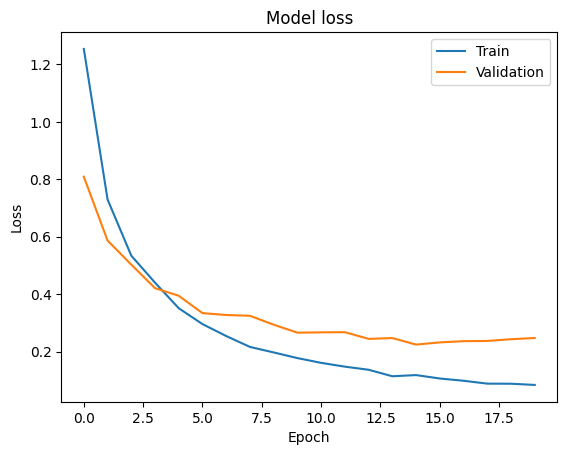

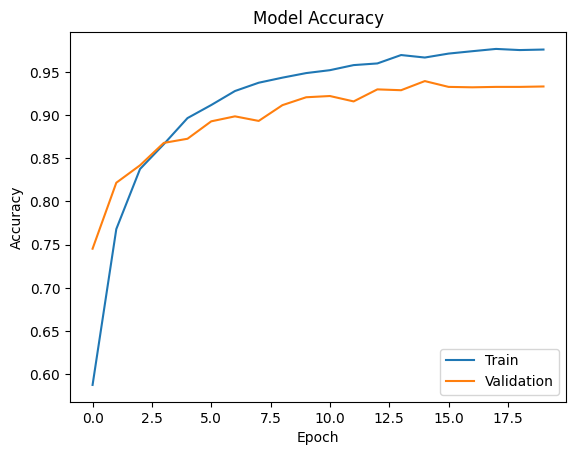

In [27]:
# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [28]:
model.save("rice_model2.keras")

## Predictions

In [29]:
# Assuming label_names contains the class names in the correct order
labels = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast',
               'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

# Predict the labels of the test set
predictions = model.predict(test_ds)

predicted_labels = [labels[prediction.argmax()] for prediction in predictions]
set(predicted_labels)

109/109 [==============================] - 14s 106ms/step


{'bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro'}